In [5]:
import sys; import os
!{sys.executable} -m pip install Pillow==6.1

In [1]:
import sys; import os
from fastai.vision import *
import wandb
from wandb.fastai import WandbCallback

/opt/conda/lib/python3.6/site-packages/torchvision/io/_video_opt.py:17: UserWarning: video reader based on ffmpeg c++ ops not available
  warnings.warn("video reader based on ffmpeg c++ ops not available")


In [2]:
rootname = 'emotions/RAF_Face_Database_basic'
path = Path('/course-v3/nbs/dl1/data')/rootname
label_list = path/'EmoLabel/list_patition_label.txt'
images = path/'Image/original'
label_map = {
    1: 'Surprise',
    2: 'Fear',
    3: 'Disgust',
    4: 'Happiness',
    5: 'Sadness',
    6: 'Anger',
    7: 'Neutral'
}

In [3]:
labels_df = pd.read_csv(filepath_or_buffer=label_list, delimiter=' ', names=['fnames', 'labels'])
labels_df['labels'] = labels_df['labels'].apply(lambda x: label_map[x])

In [4]:
# TODO: homogenize color profiles of training and testing pictures because the 
# in the wild data often has color profiles indicative of emotions

np.random.seed(46)
# data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
_tfms = get_transforms()
data = ImageDataBunch.from_df(
    path=images, 
    df=labels_df,
    valid_pct=0.2,
    ds_tfms=_tfms,
    size=224,
    num_workers=4
).normalize(imagenet_stats)

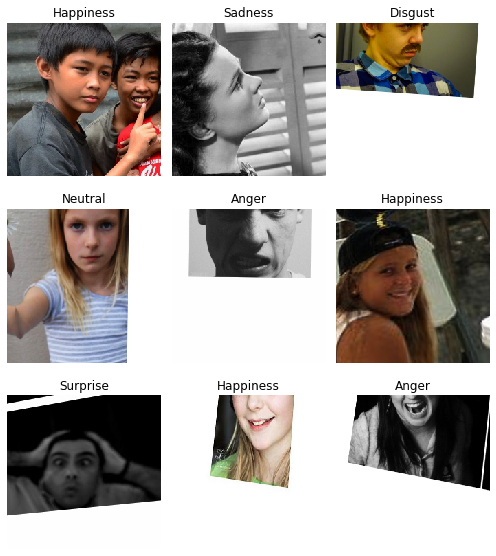

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
print('classes:', len(data.classes))
print('samples in training:', len(data.train_ds))
print('samples in validation:', len(data.valid_ds))

classes: 7
samples in training: 12272
samples in validation: 3067


In [33]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, callback_fns=WandbCallback)

In [ ]:
learn.fit_one_cycle(50, callbacks=WandbCallback(learn, input_type='images'))

epoch,train_loss,valid_loss,error_rate,time
0,1.023967,1.021129,0.368438,03:08
1,0.989748,1.009206,0.363547,03:07
2,0.999038,0.999329,0.358657,03:08
3,0.975264,0.986004,0.353114,03:08
4,0.965705,0.975814,0.348223,03:07
5,0.960980,0.960123,0.341050,03:08
6,0.934961,0.941470,0.334529,03:08
7,0.906647,0.899307,0.321487,03:08
8,0.886787,0.896789,0.323443,03:08


Better model found at epoch 0 with valid_loss value: 1.02112877368927.


Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable


Better model found at epoch 0 with valid_loss value: 1.02112877368927.
Better model found at epoch 1 with valid_loss value: 1.0092061758041382.
Better model found at epoch 1 with valid_loss value: 1.0092061758041382.
Better model found at epoch 2 with valid_loss value: 0.9993292689323425.
Better model found at epoch 2 with valid_loss value: 0.9993292689323425.
Better model found at epoch 3 with valid_loss value: 0.9860044717788696.
Better model found at epoch 3 with valid_loss value: 0.9860044717788696.
Better model found at epoch 4 with valid_loss value: 0.9758135080337524.
Better model found at epoch 4 with valid_loss value: 0.9758135080337524.
Better model found at epoch 5 with valid_loss value: 0.96012282371521.
Better model found at epoch 5 with valid_loss value: 0.96012282371521.
Better model found at epoch 6 with valid_loss value: 0.9414702653884888.
Better model found at epoch 6 with valid_loss value: 0.9414702653884888.
Better model found at epoch 7 with valid_loss value: 0.89

In [19]:
wandb.init(project=rootname.replace('/', '-').lower(),)

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable


W&B Run: https://app.wandb.ai/soellingeraj/emotions-raf_face_database_basic/runs/jbq4ux4m

In [20]:
start_run = 'run-20200517_193201-2nhhopdy'
learn = cnn_learner(
    data, models.resnet50, metrics=error_rate, callback_fns=WandbCallback
)
learn.load('/course-v3/nbs/dl1/wandb/{}/bestmodel'.format(start_run), strict=False,remove_module=True);

In [21]:
learn.unfreeze()

In [2]:
learn.lr_find()

NameError: name 'learn' is not defined

In [1]:
learn.recorder.plot_lr()

NameError: name 'learn' is not defined

In [ ]:
learn.fit_one_cycle(
    cyc_len=120,
    max_lr=slice(1.5e-5,1.4e-3),
    callbacks=WandbCallback(
        learn, input_type='images'
    )
)

epoch,train_loss,valid_loss,error_rate,time
0,2.447590,1.719246,0.550375,04:07
1,2.012411,1.424300,0.450929,04:08
2,1.692323,1.234504,0.391588,04:08
3,1.426744,1.100809,0.351810,04:08
4,1.278827,0.964490,0.320509,04:07
5,1.108353,0.911627,0.293772,04:07
6,0.980411,0.841807,0.283665,04:07
7,0.886572,0.798993,0.264754,04:08
8,0.780812,0.786676,0.254646,04:08
9,0.726768,0.746726,0.249429,04:08


Better model found at epoch 0 with valid_loss value: 1.7192459106445312.


Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable


Better model found at epoch 0 with valid_loss value: 1.7192459106445312.
Better model found at epoch 1 with valid_loss value: 1.424299955368042.
Better model found at epoch 1 with valid_loss value: 1.424299955368042.
Better model found at epoch 2 with valid_loss value: 1.234504222869873.
Better model found at epoch 2 with valid_loss value: 1.234504222869873.
Better model found at epoch 3 with valid_loss value: 1.1008089780807495.
Better model found at epoch 3 with valid_loss value: 1.1008089780807495.
Better model found at epoch 4 with valid_loss value: 0.964489758014679.
Better model found at epoch 4 with valid_loss value: 0.964489758014679.
Better model found at epoch 5 with valid_loss value: 0.9116269946098328.
Better model found at epoch 5 with valid_loss value: 0.9116269946098328.
Better model found at epoch 6 with valid_loss value: 0.8418065309524536.
Better model found at epoch 6 with valid_loss value: 0.8418065309524536.
Better model found at epoch 7 with valid_loss value: 0.79

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [72]:
latest_run = 'run-20200516_072327-1altb7ba'
best_model = '/course-v3/nbs/dl1/wandb/{}/bestmodel'.format(latest_run)

In [73]:
learn.load(best_model)

Learner(data=ImageDataBunch;

Train: LabelList (1466 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sad_woman,sad_woman,sad_woman,sad_woman,sad_woman
Path: data/emotions;

Valid: LabelList (366 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
surprised_woman,fearful_man,happy_woman,disgusted_man,happy_woman
Path: data/emotions;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps

In [ ]:
wget https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1
wget https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip?download=1

In [46]:
interp = ClassificationInterpretation.from_learner(learn)

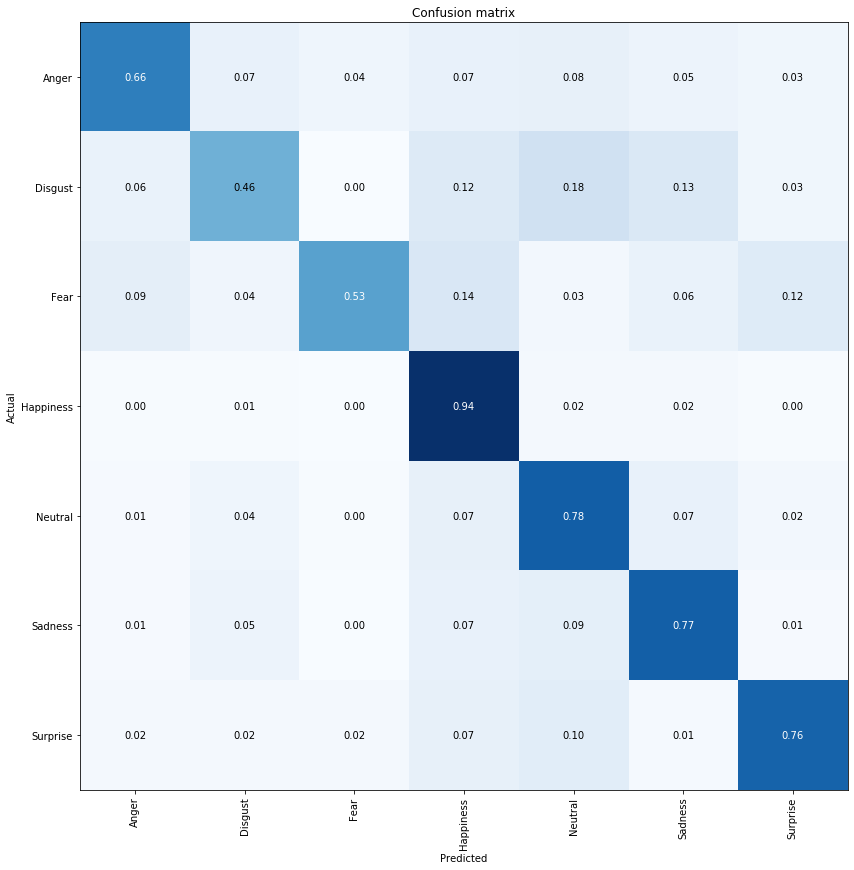

In [47]:
interp.plot_confusion_matrix(figsize=(12,12), normalize=True)

## Clean up dataset

In [9]:
from fastai.widgets import *

In [10]:
db = (data)

In [11]:
learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)
latest_run = 'run-20200517_183348-1ixbbfl5'
learn_cln.load('/course-v3/nbs/dl1/wandb/{}/bestmodel'.format(latest_run));

In [12]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [13]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())